# VGG Spoof
This notebook holds a minimum working example of how to create universal adversarial perterbations as seen in this paper https://arxiv.org/abs/1610.08401.

In [67]:
import keras
from keras.applications import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [17]:
# Load in the pretrained VGG16 Network for training
model = VGG16(include_top=True, weights='imagenet',
              input_tensor=None, input_shape=None,
              pooling=None,
              classes=1000)

(224, 224, 3)
(1, 224, 224, 3)
[[(u'n02124075', u'Egyptian_cat', 0.9660846), (u'n02123045', u'tabby', 0.011497247), (u'n02441942', u'weasel', 0.0074721822), (u'n02123159', u'tiger_cat', 0.003889537), (u'n02123597', u'Siamese_cat', 0.003236552)]]


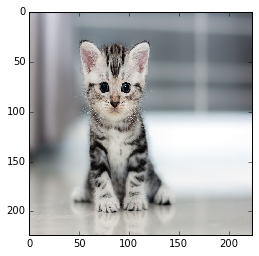

In [70]:
# Test a single image from image net to see the class
# Load in the image to the correct dimensions
temp_image = image.load_img('cat.jpg', grayscale=False, target_size=(224, 224, 3))
print(image.img_to_array(temp_image, data_format=None).shape)
print(np.array([image.img_to_array(temp_image)]).shape)

# Predict the class of the image
pred = model.predict(np.array([image.img_to_array(temp_image, data_format=None)]))
print(decode_predictions(pred))

# Display the image for kicks
plt.imshow(temp_image)

In [ ]:
# Create the spoofed image
# TODO::
def spoof():
    pass